ANALIZA PODATKOV O NEPREMIČNINAH NA TRGU

Najprej naložimo ustrezne knjižnice:

In [2]:
import pandas as pd
import numpy as np
import os.path
import matplotlib.pyplot as plt

pd.options.display.max_rows = 13
%matplotlib notebook

Naložimo podatke, ki jih bomo analizirali:

In [3]:
pot_oglasi = os.path.join('podatki_nepremicnine','nepremicnine.csv')
pot_regije = os.path.join('podatki_nepremicnine','regije.csv')
oglasi = pd.read_csv(pot_oglasi, index_col='id')
regije = pd.read_csv(pot_regije, index_col='indeks')

Za lažjo primerjavo cen stanovanj bomo najprej izračunali ceno vsakega stanovanja na kvadratni meter.

In [4]:
cene_na_m2 = oglasi.cena / oglasi.velikost
oglasi['cena_na_m2'] = cene_na_m2

Poglejmo si najprej, koliko stanovanj je naprodaj v posamezni regiji:

In [41]:
oglasi_z_regijami = pd.merge(oglasi, regije, left_on='regija', right_on='indeks', suffixes=('_indeks', '_ime'))
oglasi_z_regijami

,naslov,regija_indeks,velikost,zemljisce,tip,leto,obnova,opis,agencija,cena,cena_na_m2,regija_ime
0,AJDOVŠČINA,1,49.72,NaN,2.0,1925.0,2008.0,"49,72 m2, 2-sobno, zgrajeno l. 1925, adaptiran...",EURO NINE d.o.o.,95000.0,1910.699920,severna-primorska
1,AJDOVŠČINA,1,81.40,NaN,2.0,1997.0,NaN,"81,4 m2, 2-sobno, zgrajeno l. 1997, 1/2 nad., ...",EURO NINE d.o.o.,150000.0,1842.751843,severna-primorska
2,AJDOVŠČINA,1,81.40,NaN,2.0,1997.0,NaN,"81,4 m2, 2-sobno, zgrajeno l. 1997, prodamo. C...",Nepremičnine Land d.o.o.,150000.0,1842.751843,severna-primorska
3,AJDOVŠČINA,1,238.43,NaN,4.0,2018.0,NaN,"238,43 m2, 4-sobno, zgrajeno l. 2018, P/2 nad....","Aeon nepremičnine, d.o.o., PE Izola",178710.0,749.528163,severna-primorska
4,"AJDOVŠČINA, BEVKOVA ULICA 2",1,63.00,NaN,3.0,1978.0,2020.0,"63 m2, 3-sobno, zgrajeno l. 1978, adaptirano l...",Zasebna ponudba,130000.0,2063.492063,severna-primorska
...,...,...,...,...,...,...,...,...,...,...,...,...
2148,MURSKA SOBOTA,13,94.30,NaN,3.0,1980.0,2017.0,"94,3 m2, 3-sobno, dupleks, zgrajeno l. 1980, a...","APARTMA, nepremičnine, Nuša Vidic s.p.",129000.0,1367.974549,pomurska
2149,MURSKA SOBOTA,13,118.40,NaN,2.5,1928.0,NaN,"118,4 m2, 2,5-sobno, zgrajeno l. 1928, 1. nad....","Nepremičnine Pomurje, IMERS Igor Meolic s.p.",69800.0,589.527027,pomurska
2150,RADENCI,13,98.00,NaN,3.0,1974.0,2001.0,"98 m2, 3-sobno, zgrajeno l. 1974, adaptirano l...",Zasebna ponudba,120000.0,1224.489796,pomurska
2151,STARA CESTA,13,78.00,NaN,3.0,1950.0,NaN,"78 m2, 3-sobno, zgrajeno l. 1950, 1/2 nad., Pr...","Nepremičnine SV, Tomaž Poredoš s.p.",22000.0,282.051282,pomurska


<IPython.core.display.Javascript object>


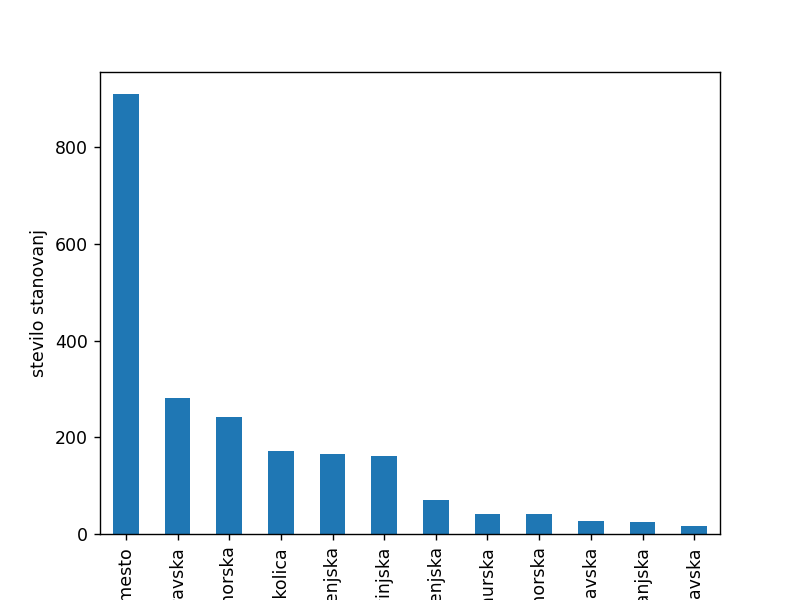

<AxesSubplot:xlabel='regija_ime', ylabel='stevilo stanovanj'>

In [52]:
oglasi_z_regijami.groupby('regija_ime').size().sort_values(ascending=False).plot.bar(xlabel='regija_ime', ylabel='stevilo stanovanj')

Primerjajmo še povprečne cene stanovanj na kvadratni meter med posameznimi regijami:

<IPython.core.display.Javascript object>


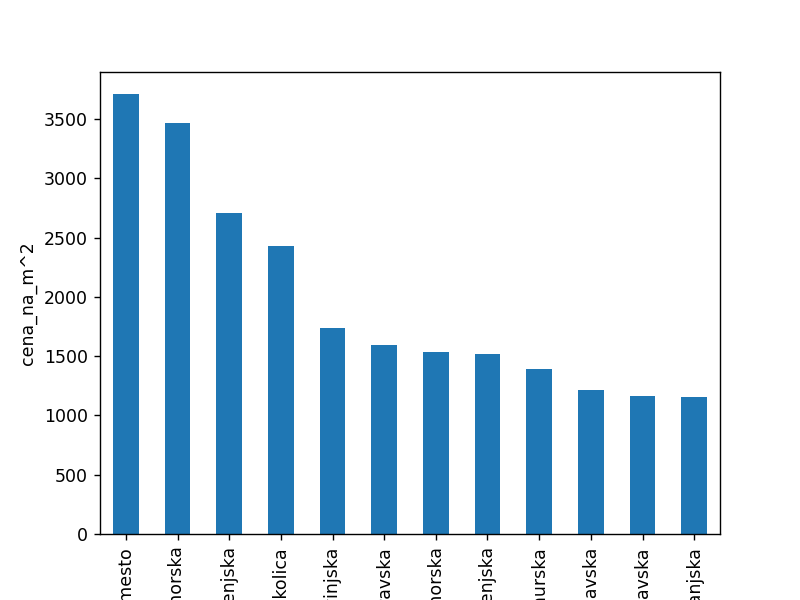

<AxesSubplot:xlabel='regija_ime', ylabel='cena_na_m^2'>

In [50]:
oglasi_z_regijami.groupby('regija_ime').mean().sort_values('cena_na_m2', ascending=False).cena_na_m2.plot.bar(xlabel='regija_ime', ylabel='cena_na_m^2')

Naša hipoteza je, da so manjša stanovanja dražja glede na kvadratni meter. To bomo preverili z naslednjim diagramom, ki prikazuje odvisnost med velikostjo stanovanja in njegovo ceno na kvadratni meter. Ker so nekateri nereprezentativni podatki uničevali kakovost diagrama, sem velikost omejila na 1500 m^2.

<IPython.core.display.Javascript object>


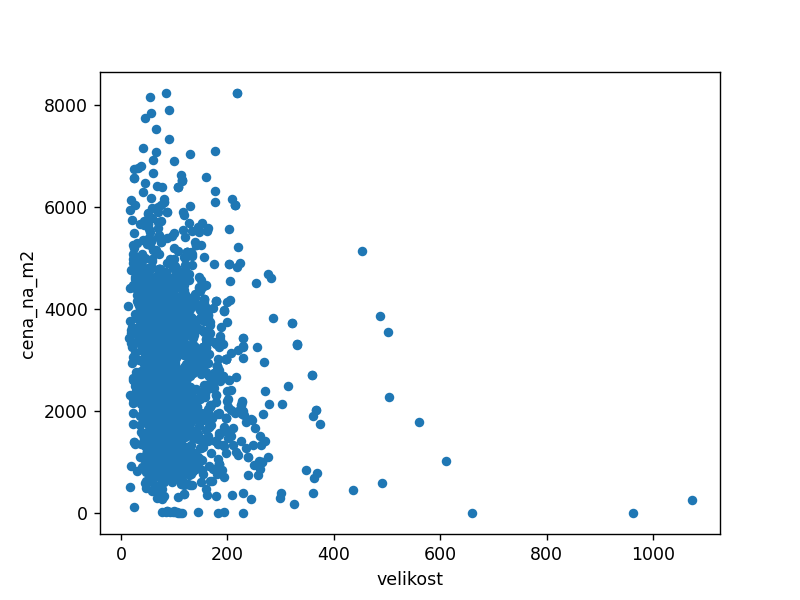

<AxesSubplot:xlabel='velikost', ylabel='cena_na_m2'>

In [53]:
oglasi[oglasi.velikost < 1500].sort_values('velikost').plot.scatter(x='velikost', y='cena_na_m2')